# Lending Club Risk Analytics Case Study
Exploratory Data Analysis to Identify Drivers of Loan Defaults

## Project Content:

This project involves a detailed Exploratory Data Analysis (EDA) on loan data from Lending Club.

Background: The objective is to understand patterns and variables that influence loan defaults to help Lending Club reduce credit losses and make informed lending decisions.

Business Problem: Lending Club faces two major risks:
Loss of business when loans to eligible applicants are rejected.
Financial loss when loans are approved for applicants likely to default.

Dataset: Historical loan data from 2007 to 2011, including attributes like loan amount, interest rate, term, grade, employment length, and outcome (e.g., fully paid, charged-off).

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the loan CSV file

In [2]:
df = pd.read_csv("data/loan.csv")

### Understanding the data and columns

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Verifying the quantity of rows and columns

In [6]:
df.shape

(39717, 111)

## Data cleaning

### Verifying the presence of NaN values in the dataset

In [7]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

### Getting all the columns that are missing data

In [8]:
missing_info = pd.DataFrame(df.isna().sum().sort_values(ascending=False)).reset_index()
missing_info.rename(columns={'index' : 'col_name',0: 'null_count'}, inplace=True)

In [9]:
missing_info['missing_per'] = missing_info['null_count']/df.shape[0]*100

In [10]:
missing_info

,col_name,null_count,missing_per
0,verification_status_joint,39717,100.0
1,annual_inc_joint,39717,100.0
2,mo_sin_old_rev_tl_op,39717,100.0
3,mo_sin_old_il_acct,39717,100.0
4,bc_util,39717,100.0
...,...,...,...
106,delinq_amnt,0,0.0
107,policy_code,0,0.0
108,earliest_cr_line,0,0.0
109,delinq_2yrs,0,0.0


### Seeing column where more than 40% of the information is missing

In [11]:
missing_col = missing_info[missing_info['missing_per']>40]['col_name'].to_list()

In [12]:
len(missing_col)

57

In [13]:
df1 = df.drop(labels=missing_col, axis=1)

In [14]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Finding the info that is repeated in columns

In [15]:
remove_col_list = []
for i in df1.columns:
    if df1[i].nunique() == 1:
        remove_col_list.append(i)

In [16]:
remove_col_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

### Dropping the column with repeated data.

In [17]:
df1.drop(remove_col_list, axis = 1, inplace = True)

In [18]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Examining the duplicate row

In [19]:
df1[df1.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


### Removing data if loan status is current and the borrower is still paying the loan

In [20]:
df1 = df1[df1["loan_status"].str.lower() != "current"]

In [21]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [22]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Dropping additional columns that may not be required for analysis. 

In [23]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df1.drop(drop_cols, axis = 1, inplace = True)

In [24]:
df1.shape

(38577, 18)

In [25]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

### Given that employment length is given in years, we are cleaning up the data and turning it into an integer value. A value of 0 is taken to mean that the employment length is 0.

In [26]:

def clean_years(year_str):
    # Check if the value is NaN, return NaN if true
    if pd.isna(year_str):
        return np.nan  # Return NaN for missing values
    
    # Convert to string, strip any spaces and make it lowercase
    year_str = str(year_str).lower().strip()
    
    # Handle special cases like '10+ years' and '< 1 year'
    if '10+' in year_str:
        return 10  # Treat '10+ years' as 10
    elif '< 1' in year_str:
        return 0  # Treat '< 1 year' as 0
    else:
        # Remove all non-numeric characters (e.g., 'years')
        numeric_part = ''.join(filter(str.isdigit, year_str))
        # Convert the numeric part to an integer if it exists
        return int(numeric_part) if numeric_part else np.nan
  
df1['emp_length'] = df1['emp_length'].apply(lambda x: clean_years(x))

### Describe the emp_length variable to fill in the blank

In [27]:
df1['emp_length'].describe()

count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

### Min employment length fills the empty value with minimum value—zero for analysis.

In [28]:
df1['emp_length'] = df1['emp_length'].fillna(df1['emp_length'].min())

### Getting the null value for pub_rec_bankruptcies

In [30]:
df1['pub_rec_bankruptcies'].isna().sum()

np.int64(697)

### Describing the pub_rec_bankruptcies column in order to determine all of its values

In [29]:
df1['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

### Checking people who have filed for bankruptcy in public

In [30]:
print(df1[df1['pub_rec_bankruptcies']>=1]['pub_rec_bankruptcies'].value_counts())

pub_rec_bankruptcies
1.0    1637
2.0       5
Name: count, dtype: int64


### When there are 0 pub_rec_bankruptcies in the 75 percentile, we impute the missing value to 0 / min, which is 0 only.

In [31]:
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].min())

In [32]:
df1.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### Verifying the field term's unique value

In [33]:
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

### Taking away the month from the term and changing it to type int

In [34]:
df1['term'] = df1['term'].str.rstrip(' months').astype(int)

In [35]:
df1['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

### % is removed when converting an interest rate object to a float value.

In [36]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

### Changing emp_length to an integer

In [37]:
df1['emp_length'] = df1['emp_length'].astype(int)

### In the home ownership column, there is just one column with a value of NONE; we shift that under other 

In [39]:
df1.loc[df1['home_ownership'] == 'NONE', 'home_ownership'] = 'OTHER'

In [40]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

### Source Verified: A third party, like Ciba or an outside database, checks the information. 
### Verified: The LC checks the information directly by reading the papers. 
### We can see which source verification is defaulting more.


In [41]:
df1['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [42]:
df1['dti'].value_counts()

dti
0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: count, Length: 2853, dtype: int64

In [43]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### Generated an additional data frame for the loan status that is charged_off.

In [49]:
df_charged_off = df1[df1['loan_status'] == 'Charged Off']

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

### Identifying outliers in numerical columns using the IQR method

In [51]:
numerical_columns = ['loan_amnt', 'annual_inc']
outliers_info = {}

for col in numerical_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'loan_amnt': {'Lower Bound': np.float64(-9250.0),
  'Upper Bound': np.float64(29550.0),
  'Outliers Count': 1088},
 'annual_inc': {'Lower Bound': np.float64(-23000.0),
  'Upper Bound': np.float64(145000.0),
  'Outliers Count': 0}}

### Caping the extreme values in the 'annual income' column at the upper bound

In [52]:
annual_income_upper_bound = 145000.0
df1['annual_inc'] = np.where(df1['annual_inc'] > annual_income_upper_bound, annual_income_upper_bound, df1['annual_inc'])

# Confirm changes to the 'annual income' column
df1['annual_inc'].describe()

count     38577.000000
mean      65044.917784
std       32652.937415
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64

### Identifying outliers in numerical columns using the IQR method for df_charged_off data frame

In [53]:
numerical_columns = ['loan_amnt', 'annual_inc']
outliers_info = {}

for col in numerical_columns:
    Q1 = df_charged_off[col].quantile(0.25)
    Q3 = df_charged_off[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_charged_off[(df_charged_off[col] < lower_bound) | (df_charged_off[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'loan_amnt': {'Lower Bound': np.float64(-10750.0),
  'Upper Bound': np.float64(32850.0),
  'Outliers Count': 159},
 'annual_inc': {'Lower Bound': np.float64(-20000.0),
  'Upper Bound': np.float64(132000.0),
  'Outliers Count': 260}}

### Caping extreme values in the 'annual income' column at the upper bound

In [54]:
annual_income_upper_bound = 132000.0
df_charged_off['annual_inc'] = np.where(df_charged_off['annual_inc'] > annual_income_upper_bound, annual_income_upper_bound, df_charged_off['annual_inc'])

# Confirm changes to the 'annual income' column
df_charged_off['annual_inc'].describe()

count      5627.000000
mean      59203.460944
std       29627.200036
min        4080.000000
25%       37000.000000
50%       53000.000000
75%       75000.000000
max      132000.000000
Name: annual_inc, dtype: float64

### Calculating Loan-to-Income Ratio (LTI)

In [55]:
df1['LTI'] = df1['loan_amnt'] / df1['annual_inc']
df_charged_off['LTI'] = df_charged_off['loan_amnt'] / df_charged_off['annual_inc']

### Grouping by LTI, term, installment, and verification status

In [56]:
grouped_df = df1.groupby(['LTI', 'term', 'installment', 'verification_status'])
grouped_df_charged_off = df_charged_off.groupby(['LTI', 'term', 'installment', 'verification_status'])

### Calculating summary statistics (example: mean of loan amount)

In [57]:
grouped_summary = grouped_df['loan_amnt'].mean().reset_index()
grouped_summary_charged_off = grouped_df_charged_off['loan_amnt'].mean().reset_index()
print(grouped_summary)
print(grouped_summary_charged_off)

            LTI  term  installment verification_status  loan_amnt
0      0.006897    36        31.11        Not Verified     1000.0
1      0.006897    36        31.78     Source Verified     1000.0
2      0.006897    36        32.45     Source Verified     1000.0
3      0.007375    36        30.16        Not Verified     1000.0
4      0.008333    36        30.94        Not Verified     1000.0
...         ...   ...          ...                 ...        ...
37822  0.773810    60       663.78            Verified    26000.0
37823  0.777083    36       293.85        Not Verified     9325.0
37824  0.777778    60       796.18            Verified    35000.0
37825  0.819672    60       464.55            Verified    25000.0
37826  0.830000    36       533.77        Not Verified    16600.0

[37827 rows x 5 columns]
           LTI  term  installment verification_status  loan_amnt
0     0.010000    36        33.94        Not Verified     1000.0
1     0.013301    36        41.18        Not Verifie

### Numerical Variables
- loan_amnt
- funded_amnt
- funded_amnt_inv
- term
- int_rate
- installment
- annual_inc
- dti

### Categorical Variables
- grade
- emp_length
- home_ownership
- verification_status
- issue_d
- loan_status (target variable)
- purpose
- addr_state
- pub_rec_bankruptcies


# Univariate Analysis

### Numerical Variable Plots

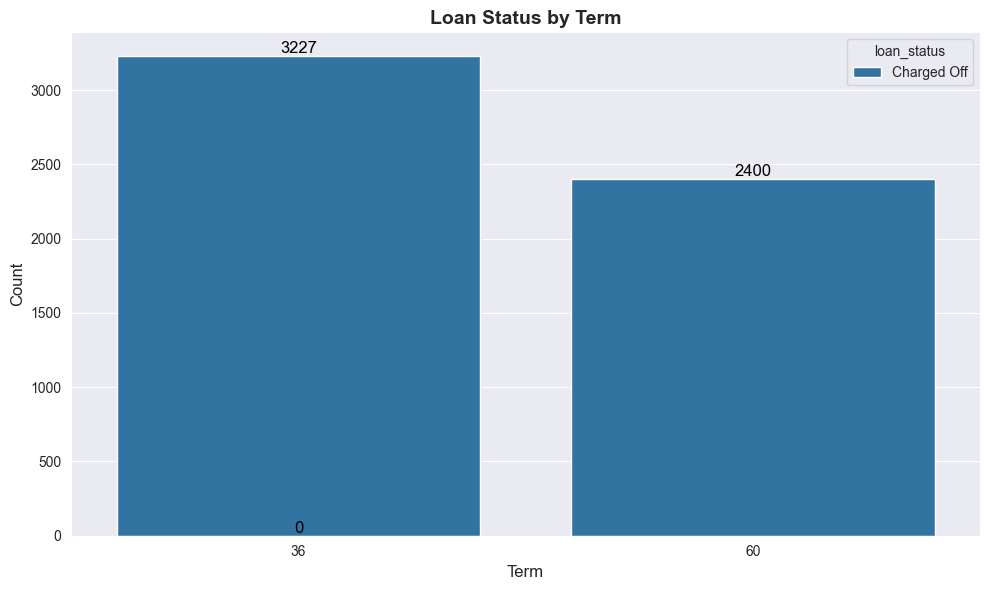

In [58]:
# Create a figure with subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))  # Adjust figsize to fit the plots

# Create the countplot
sns.countplot(data=df_charged_off, x='term', hue='loan_status', ax=ax)  

# Add annotations for each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X position
        p.get_height(),                 # Y position
        '%d' % int(p.get_height()),     # Text (height of the bar)
        fontsize=12,                    # Font size
        color='black',                  # Text color
        ha='center',                    # Horizontal alignment
        va='bottom'                     # Vertical alignment
    )

# Add title and labels
ax.set_title("Loan Status by Term", fontsize=14, weight='bold')
ax.set_xlabel("Term", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# In the defaulted data frame, 57% of individuals with a term of 36 are exhibiting higher default.


### Plotting the loan amount with All and Charged_Off Data frame

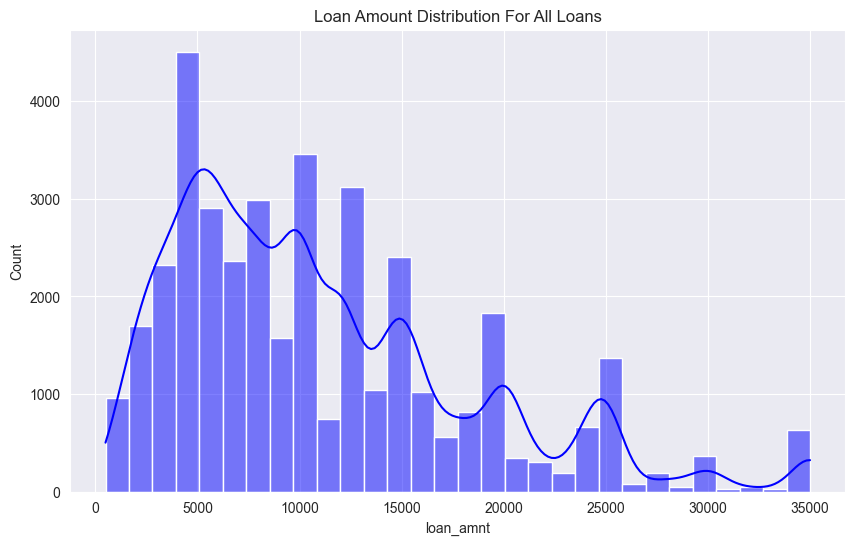

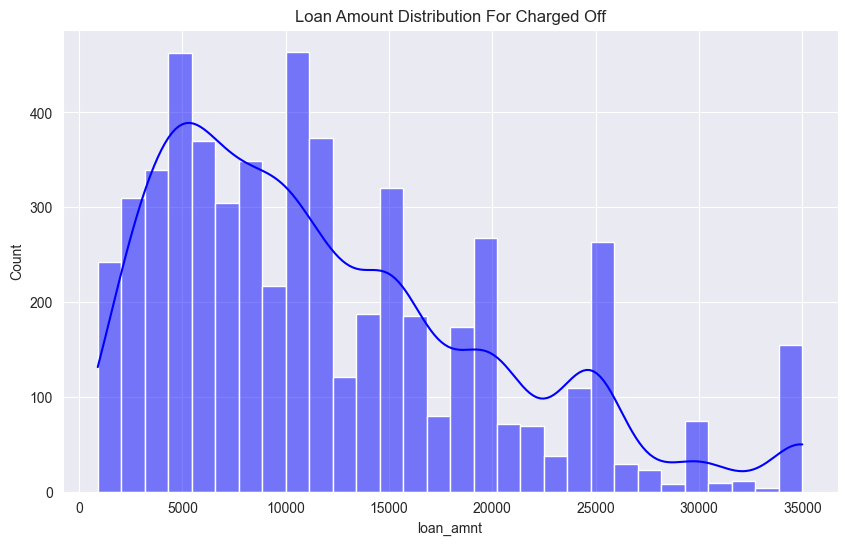

In [59]:
# Plot 1: Loan amount Distribution for All Loans
plt.figure(figsize=(10, 6))
sns.histplot(df1['loan_amnt'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution For All Loans")
plt.show()

# Plot 2: Loan amount Distribution for Charged Off Loans
plt.figure(figsize=(10, 6))
sns.histplot(df_charged_off['loan_amnt'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution For Charged Off")
plt.show()

# Individuals who have borrowed amounts ranging from 5,000 to 16,000 are more likely to default.
# There is a noticeable decline in charged-off loans for larger loan amounts, with a significant drop after $20,000. This suggests that larger loan amounts may be associated with a lower likelihood of being charged off.

### Interest Rate Distribution Plot

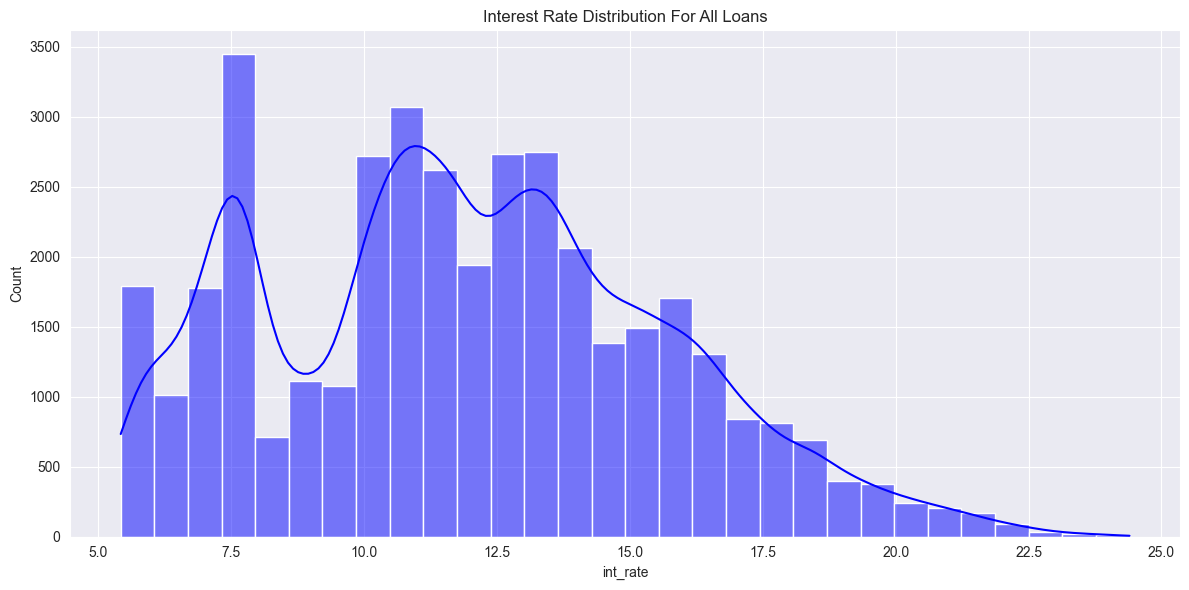

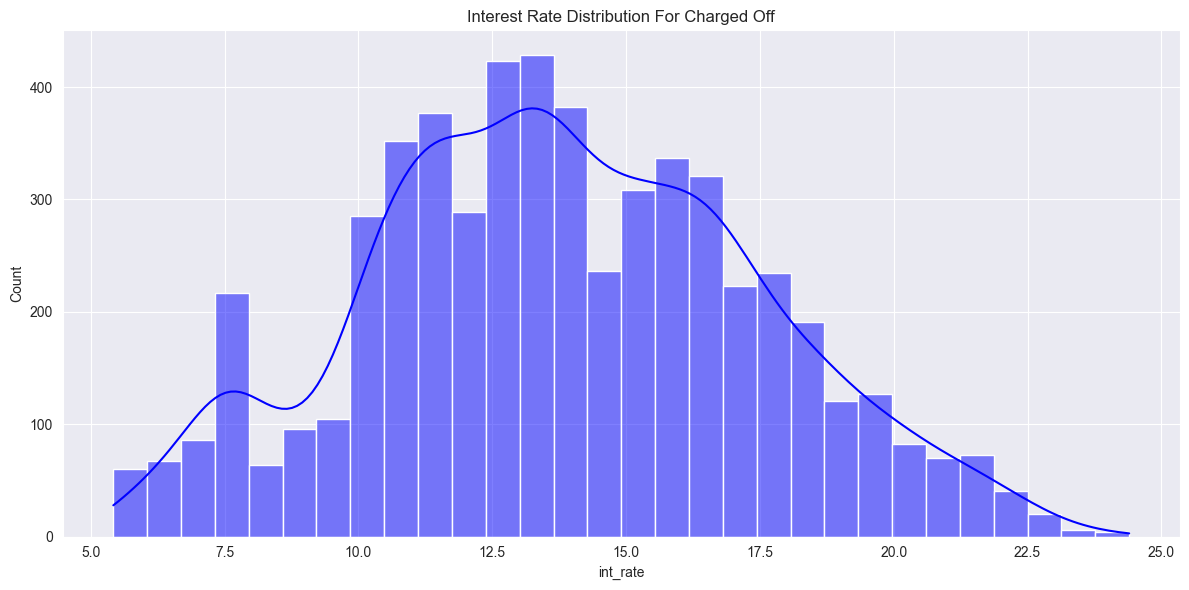

In [60]:
# Plot 1: Interest Rate Distribution for All Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['int_rate'], bins=30, kde=True, color='blue')
plt.title("Interest Rate Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: Interest Rate Distribution for Charged Off Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['int_rate'], bins=30, kde=True, color='blue')
plt.title("Interest Rate Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# When the interest rate is between 10 and 16 percent, there is a clear increase in the number of loans that are charged off.

### Debt To Income ration distribution chart plot

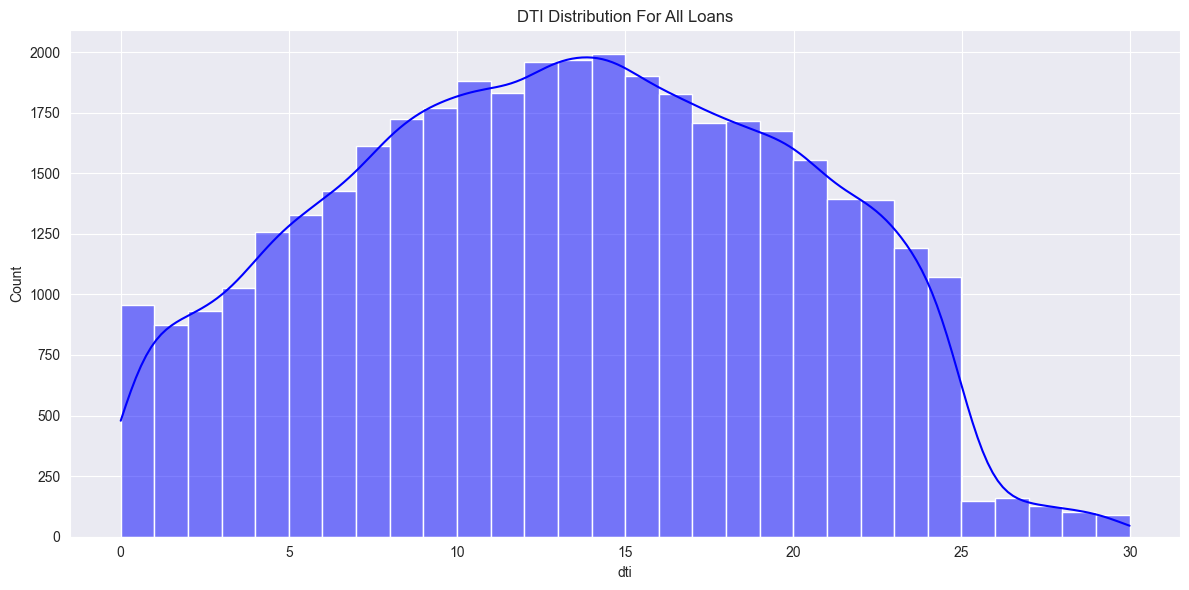

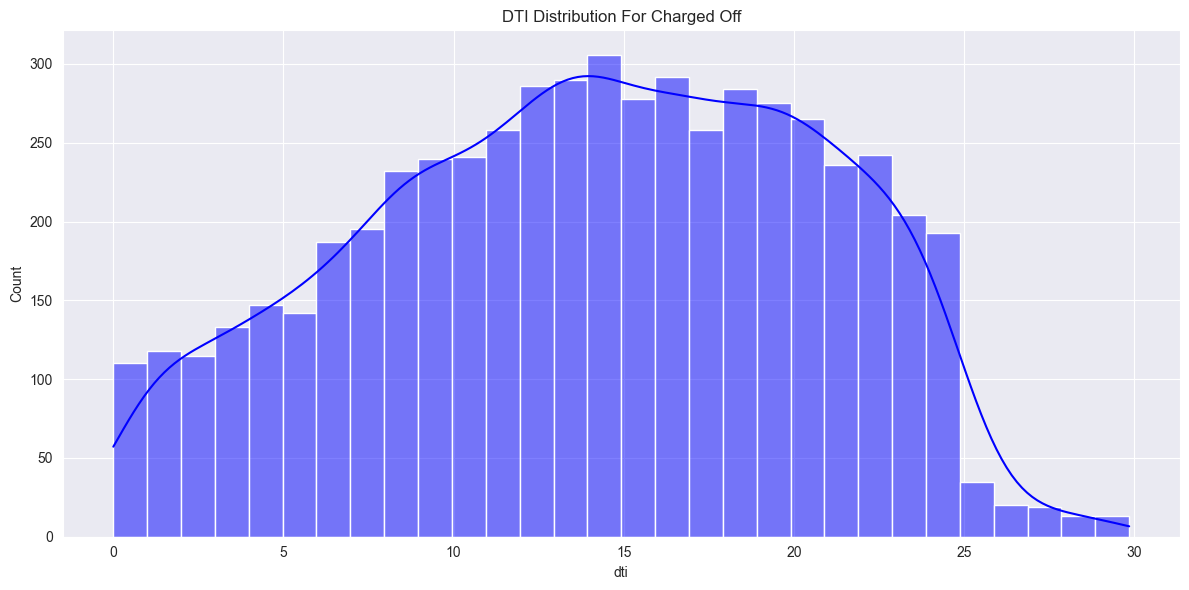

In [61]:
# Plot 1: DTI Distribution for All Loans DTI
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['dti'], bins=30, kde=True, color='blue')
plt.title("DTI Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: DTI Distribution for Charged Off Loans DTI
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['dti'], bins=30, kde=True, color='blue')
plt.title("DTI Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# People whose DTI is between 9 and 20 are more likely to not pay back their loans.

### Categorical Plot

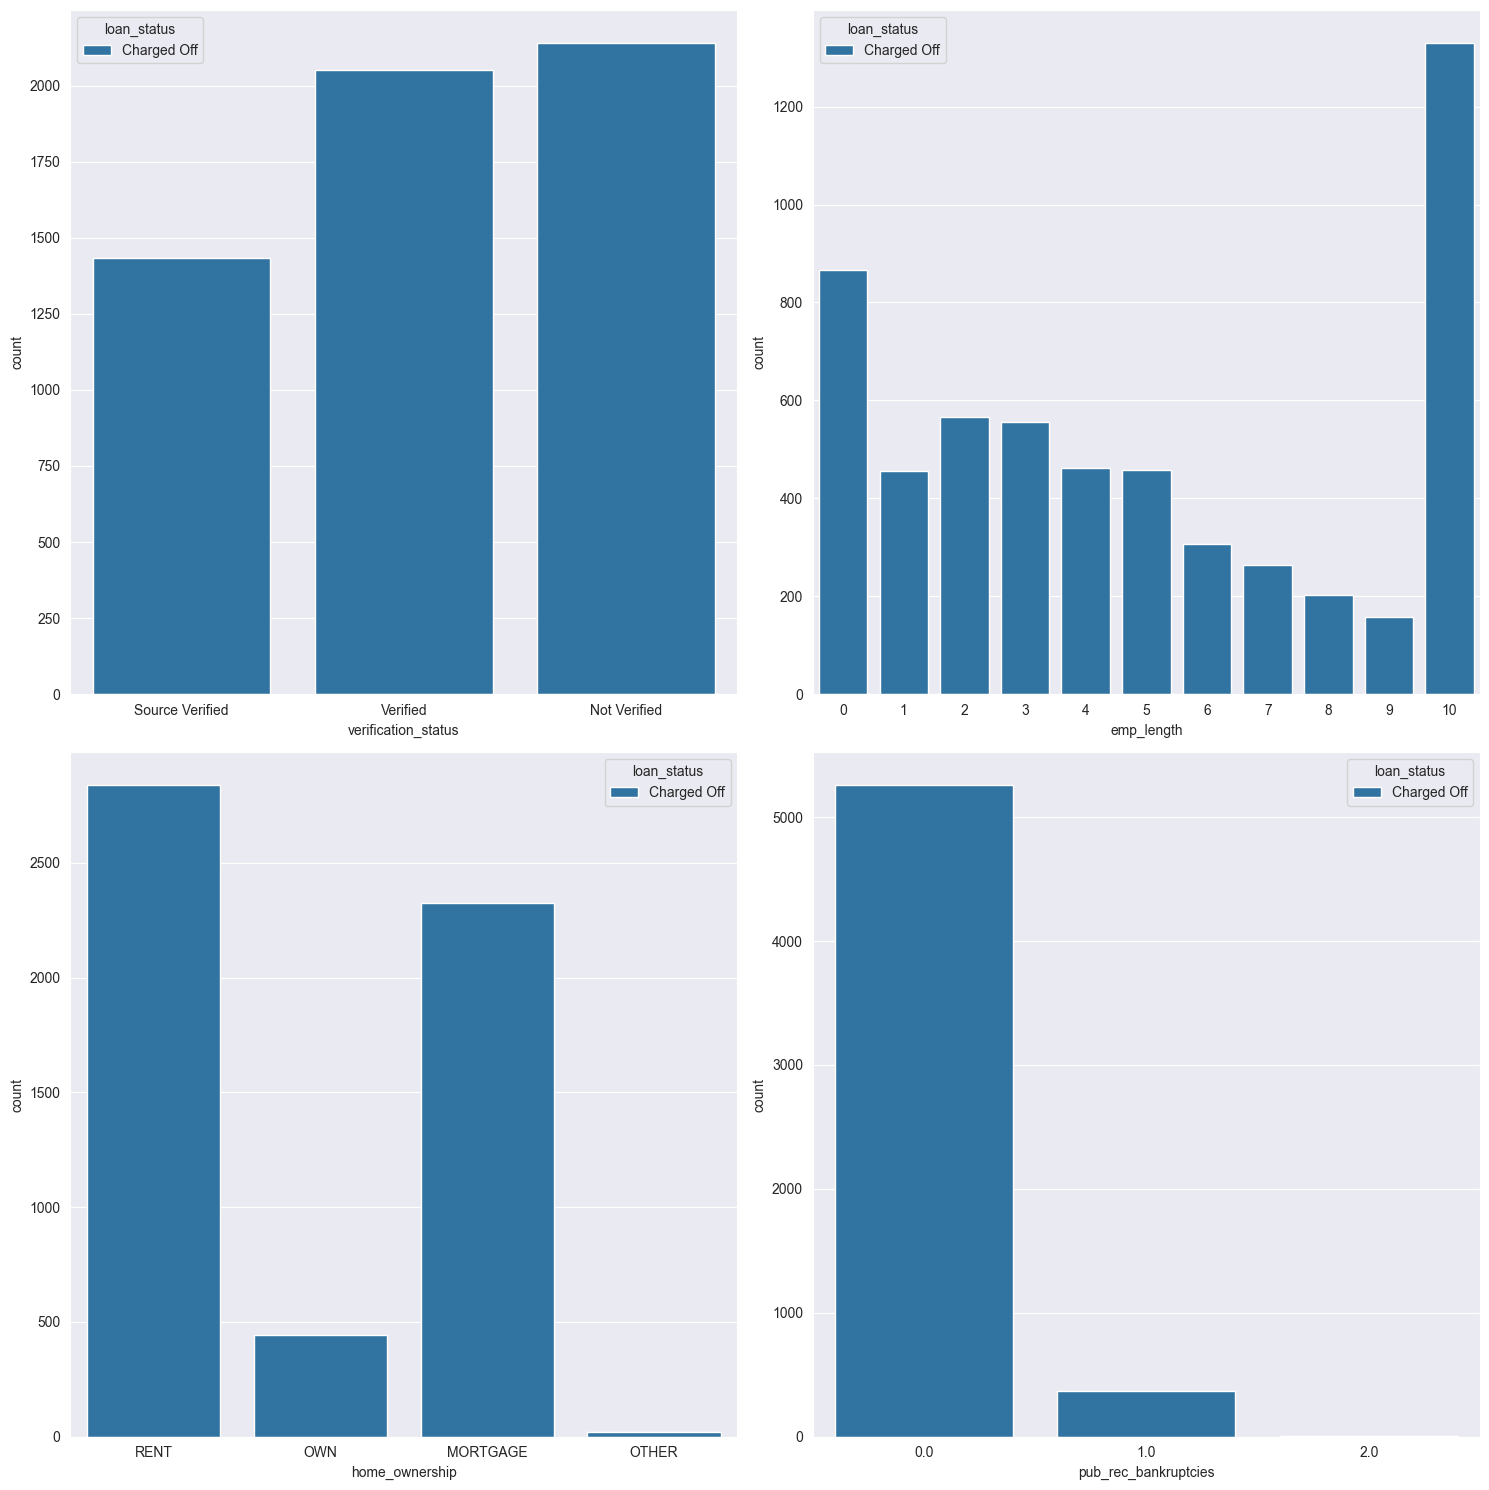

In [63]:
# Columns to plot
plot_columns = ['verification_status', 'emp_length', 'home_ownership', 'pub_rec_bankruptcies']

# Create a figure with subplots (8 plots in total)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))  # Adjust figsize to fit the plots

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot
for i, col in enumerate(plot_columns):
    sns.countplot(data=df_charged_off, x=col, hue='loan_status', ax=axes[i])  # Assign each plot to the correct axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Loans with LC verified status and not verified, both pose higher risk of charged-off instances

## Borrower with shorter employment length less than year and 10 or 10+ year employment have higher likelihood to default

## The highest number of charged-off loans is attributed to borrowers who own their residences on a rental basis and have mortgages.

## Borrowers who have not filed for bankruptcy in the public record have a significantly higher number of charged-off loans (approximately 93 percent).


### Plot for Defaulted and Non Defaulted Applier

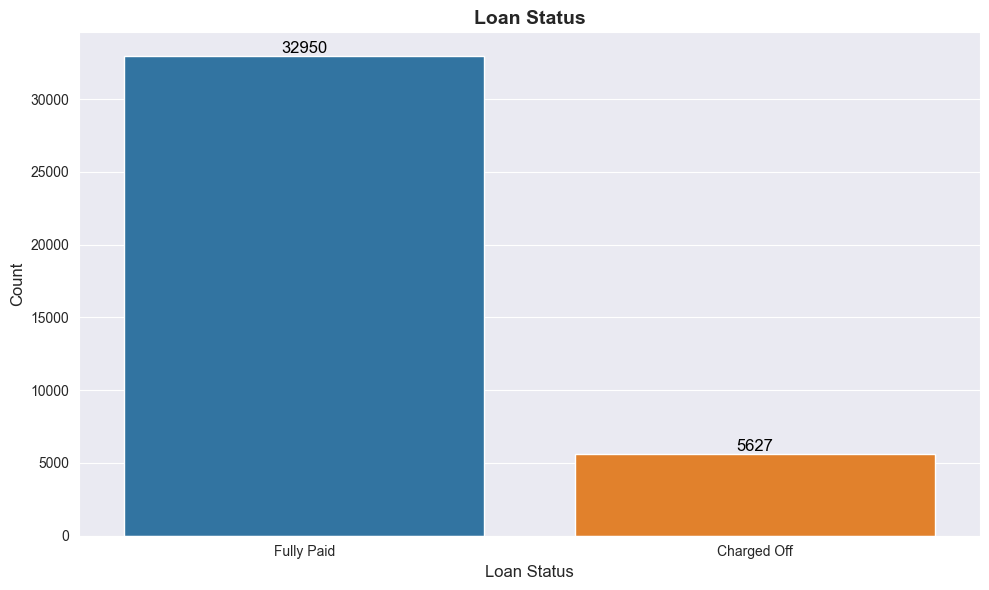

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))  # Adjust figsize to fit the plots

# Create the countplot
sns.countplot(data=df1, x='loan_status', hue='loan_status', ax=ax)  

# Add annotations for each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X position
        p.get_height(),                 # Y position
        '%d' % int(p.get_height()),     # Text (height of the bar)
        fontsize=12,                    # Font size
        color='black',                  # Text color
        ha='center',                    # Horizontal alignment
        va='bottom'                     # Vertical alignment
    )

# Add title and labels
ax.set_title("Loan Status", fontsize=14, weight='bold')
ax.set_xlabel("Loan Status", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Total number of defaulters are around 14.5 percent

### Plotting the purpose of loan with All and charged off data frame

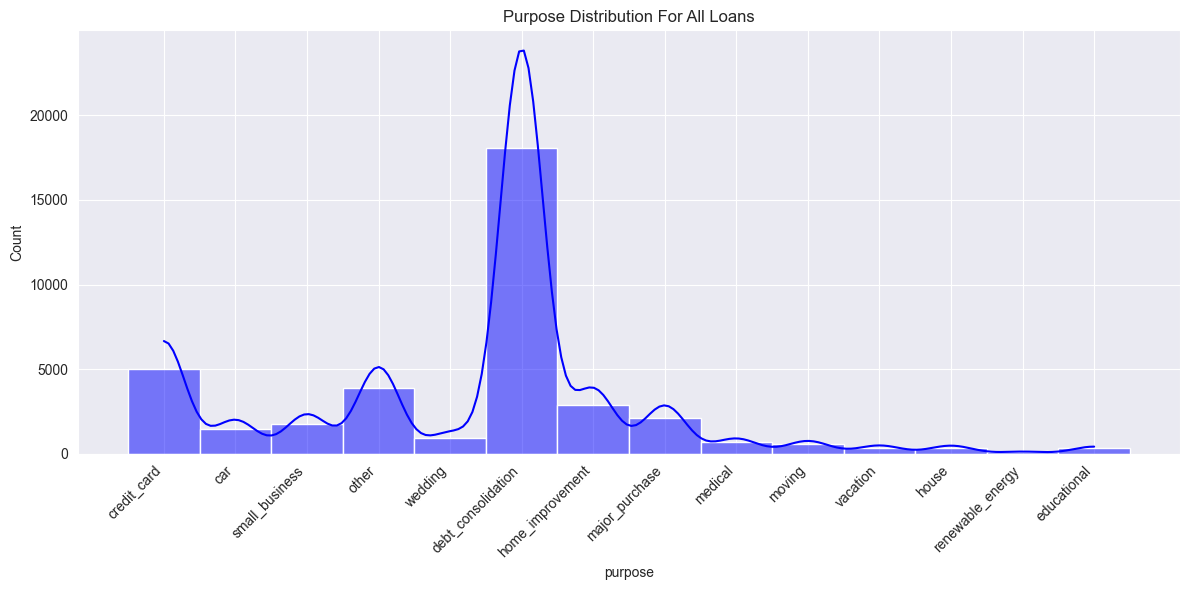

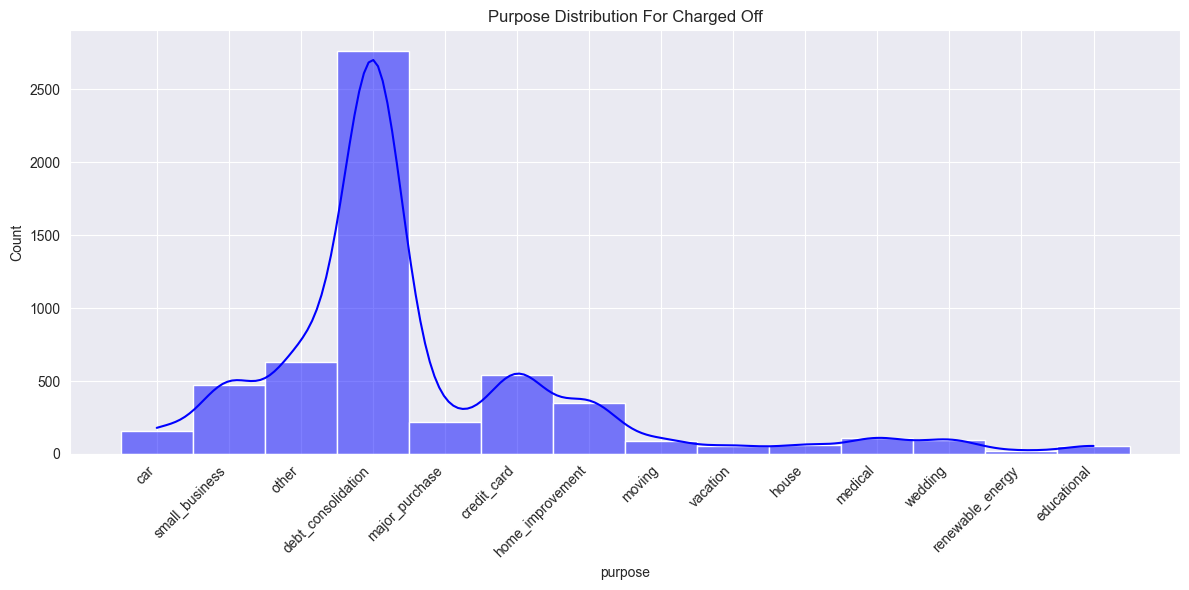

In [65]:
# Plotting the purpose of loan with charged off
purpose_order = df1['purpose'].value_counts().index

# Plot 1: Purpose Distribution for All Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['purpose'], bins=30, kde=True, color='blue', hue_order=purpose_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels more (45 degrees) for better visibility
plt.title("Purpose Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: Purpose Distribution for Charged Off Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['purpose'], bins=30, kde=True, color='blue', hue_order=purpose_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels more (45 degrees) for better visibility
plt.title("Purpose Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


## Lending club should be cautious when issuing loans for debt consolidation. This category appears to have a higher risk of default.
## Diversification of loan purposes might be beneficial. Lending club could consider diversifying their loan portfolio to include more loans for purposes with lower default rates, such as "Education" and "Renewable energy" loans.

### Plotting the Grade of loan with All and charged off DF

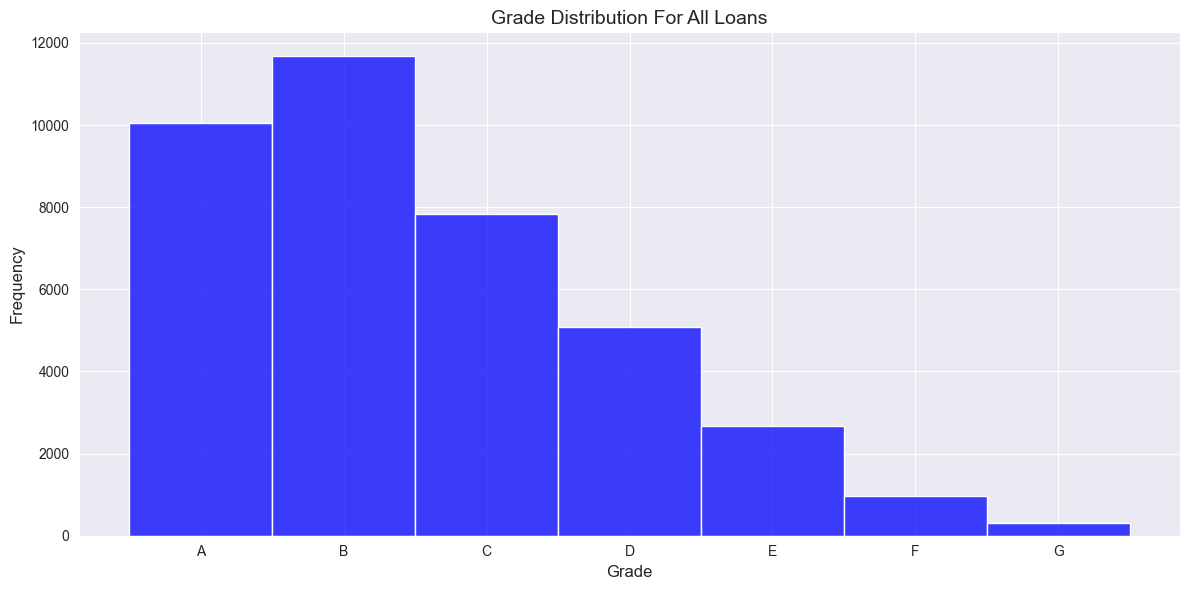

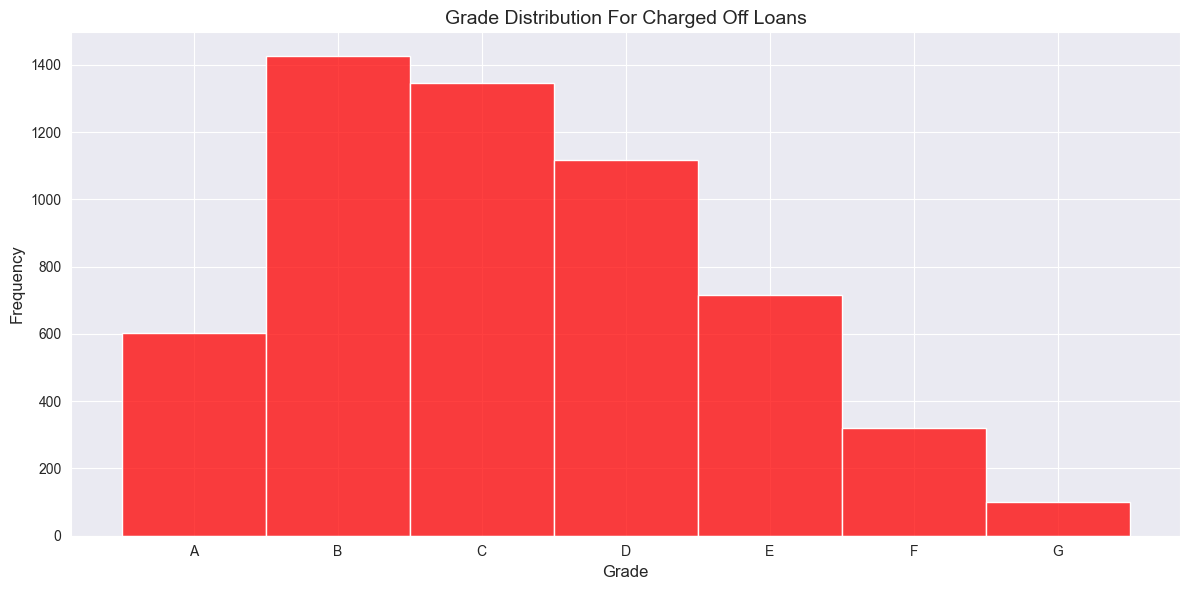

In [66]:
# Plotting the purpose of loan with charged off
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df1['grade'] = pd.Categorical(df1['grade'], categories=grade_order, ordered=True)
df_charged_off['grade'] = pd.Categorical(df_charged_off['grade'], categories=grade_order, ordered=True)

# Plot 1: Grade Distribution for All Loans
plt.figure(figsize=(12, 6))
sns.histplot(df1['grade'], kde=False, color='blue')  # No 'hue_order' needed
plt.title("Grade Distribution For All Loans", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Grade Distribution for Charged Off Loans
plt.figure(figsize=(12, 6))
sns.histplot(df_charged_off['grade'], kde=False, color='red')  # No 'hue_order' needed
plt.title("Grade Distribution For Charged Off Loans", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# Grade B has the highest default rate, and defaulters are trending downward from B to G.
# Out of all grades, Grade G has the least defaulter

# Bivariate Analysis

Create a line plot to visualize the mean loan amount by LTI

<Figure size 1000x600 with 0 Axes>

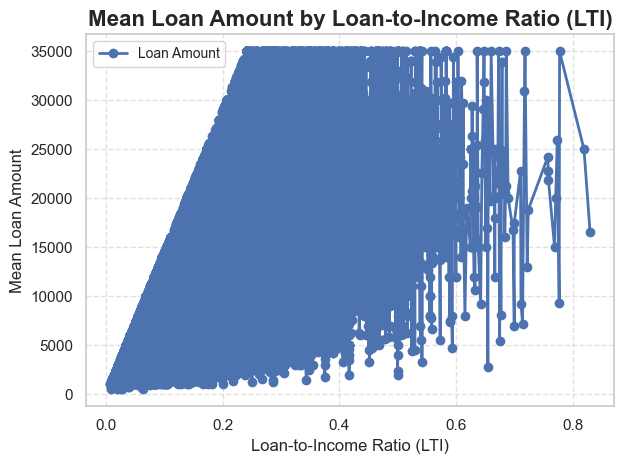

<Figure size 1000x600 with 0 Axes>

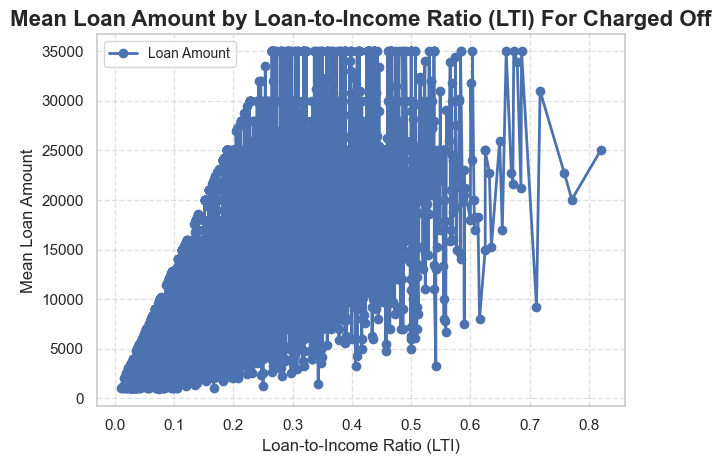

In [184]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better clarity
ax = grouped_summary.plot(x='LTI', y='loan_amnt', kind='line', color='b', marker='o', linestyle='-', linewidth=2, markersize=6)

# Add a title with improved formatting
plt.title('Mean Loan Amount by Loan-to-Income Ratio (LTI)', fontsize=16, weight='bold')

# Add labels for x and y axes
plt.xlabel('Loan-to-Income Ratio (LTI)', fontsize=12)
plt.ylabel('Mean Loan Amount', fontsize=12)

# Display a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend (optional, since we only have one line in this case)
plt.legend(['Loan Amount'], loc='upper left', fontsize=10)

# Make sure to adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))  # Adjust the figure size for better clarity
ax = grouped_summary_charged_off.plot(x='LTI', y='loan_amnt', kind='line', color='b', marker='o', linestyle='-', linewidth=2, markersize=6)

# Add a title with improved formatting
plt.title('Mean Loan Amount by Loan-to-Income Ratio (LTI) For Charged Off', fontsize=16, weight='bold')

# Add labels for x and y axes
plt.xlabel('Loan-to-Income Ratio (LTI)', fontsize=12)
plt.ylabel('Mean Loan Amount', fontsize=12)

# Display a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend (optional, since we only have one line in this case)
plt.legend(['Loan Amount'], loc='upper left', fontsize=10)

# Make sure to adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## There appears to be a positive correlation between the Loan-to-Income Ratio (LTI) and the Mean Loan Amount. LC may be more willing to provide larger loans to borrowers with higher LTI ratios, assuming they can comfortably afford the debt burden. The majority of loans are issued to borrowers with lower LTI ratios, suggesting that lenders might be more cautious when approving loans to borrowers with higher debt-to-income ratios.

## People with LTI ratio less than 0.6 are more likey to default

### Box Plot between Loan Status and Annual Income

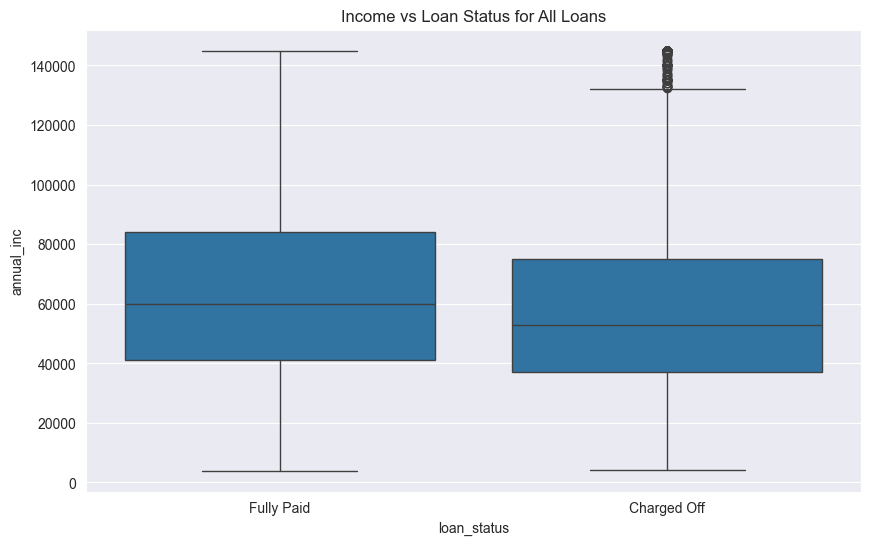

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df1)
plt.title("Income vs Loan Status for All Loans")
plt.show()


# Borrower with annual income between 37000 to 75000 have high changes of defaulting

### Bar Plot for Puprose and Loan Amount

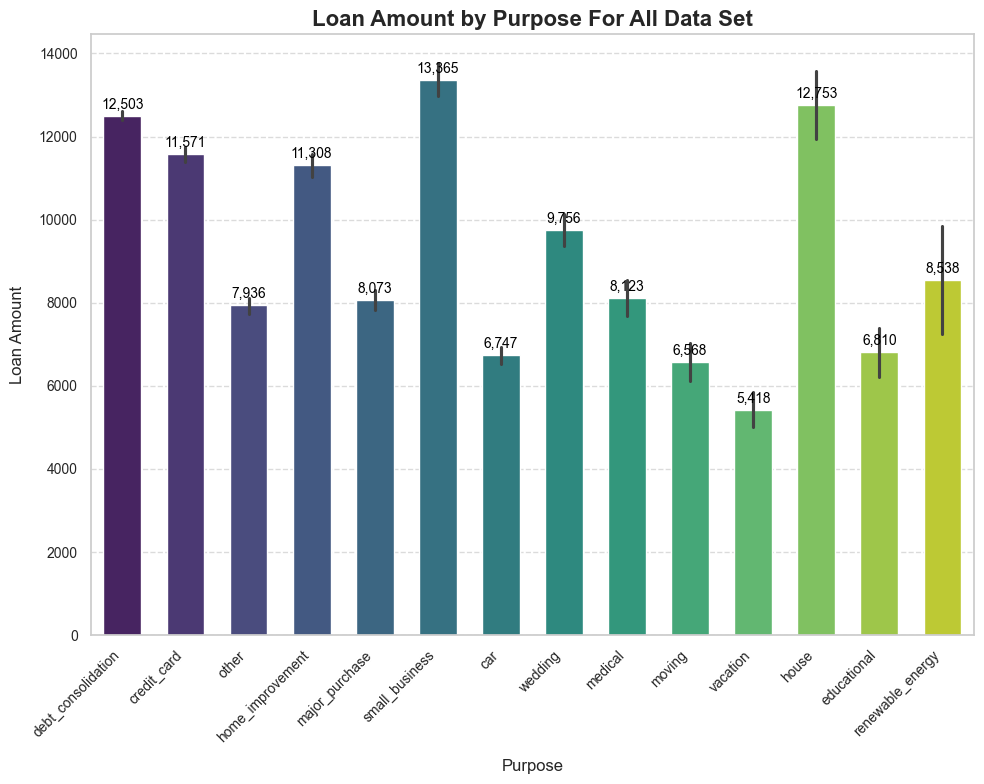

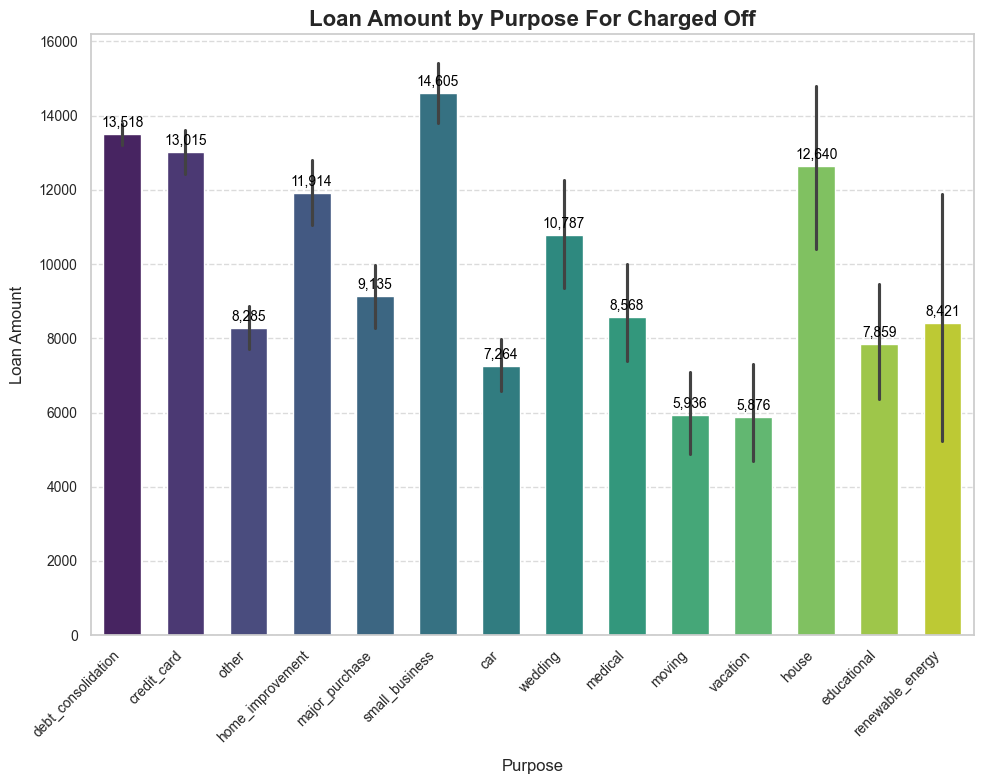

In [68]:
# Mean loan amount will be displayed
purpose_order = df1['purpose'].value_counts().index

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))  # Increase figure size for better visibility

# Bar plot with adjusted width for wider gaps between bars
ax = sns.barplot(data=df1, x='purpose', y='loan_amnt', palette='viridis', width=0.6, order=purpose_order)

# Adding value annotations above each bar with better formatting
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # Format numbers with commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
        textcoords='offset points'
    )

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate labels for better spacing
plt.yticks(fontsize=10)

# Adding labels and title with improved font sizes
plt.title("Loan Amount by Purpose For All Data Set", fontsize=16, weight='bold')
plt.xlabel("Purpose", fontsize=12, labelpad=10)  # Add padding for better spacing
plt.ylabel("Loan Amount", fontsize=12, labelpad=10)

# Adding gridlines for better data comprehension
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout for clarity
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))  # Increase figure size for better visibility

# Bar plot with adjusted width for wider gaps between bars
ax = sns.barplot(data=df_charged_off, x='purpose', y='loan_amnt', palette='viridis', width=0.6, order=purpose_order)

# Adding value annotations above each bar with better formatting
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # Format numbers with commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
        textcoords='offset points'
    )

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate labels for better spacing
plt.yticks(fontsize=10)

# Adding labels and title with improved font sizes
plt.title("Loan Amount by Purpose For Charged Off", fontsize=16, weight='bold')
plt.xlabel("Purpose", fontsize=12, labelpad=10)  # Add padding for better spacing
plt.ylabel("Loan Amount", fontsize=12, labelpad=10)

# Adding gridlines for better data comprehension
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout for clarity
plt.tight_layout()
plt.show()

# People who borrowed money for "debt_consolidation," "credit_card," "small_business," and "house" had the highest average loan amount, and they were also the most likely to not pay back their loans. Because of this, lenders should be more careful when approving loans for these reasons.

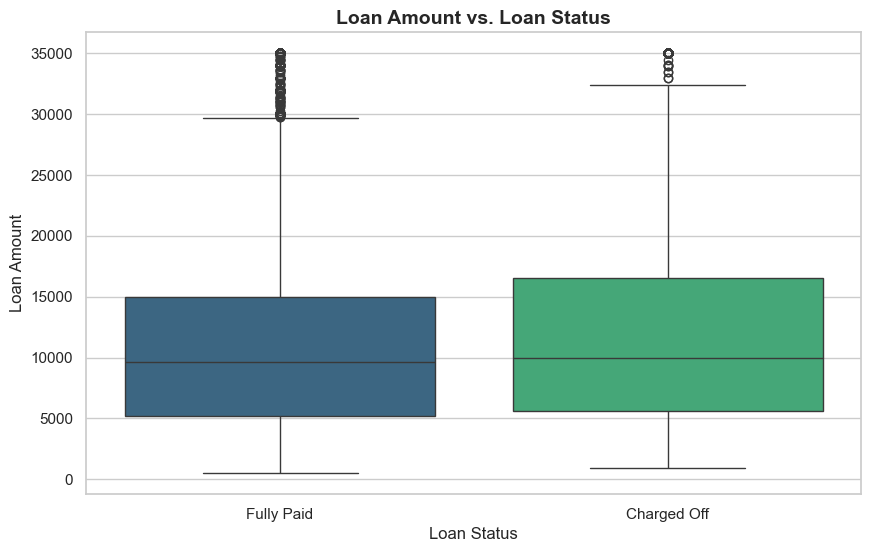

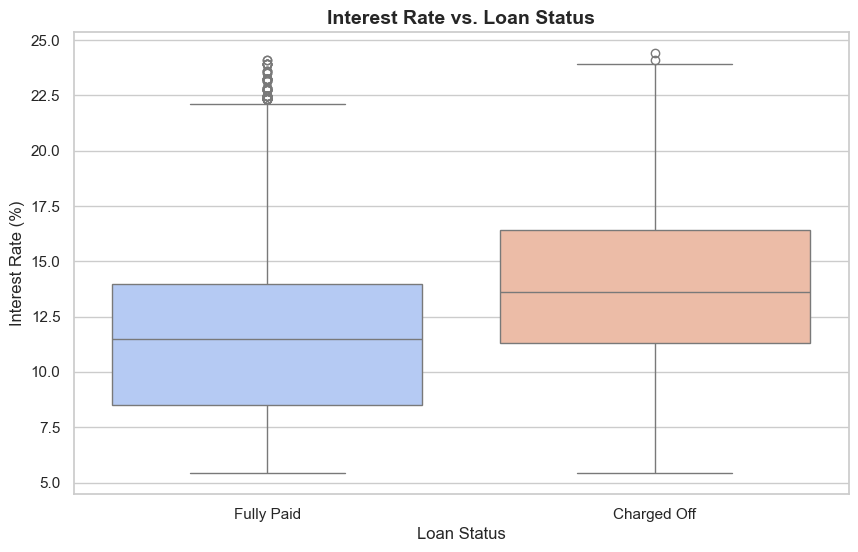

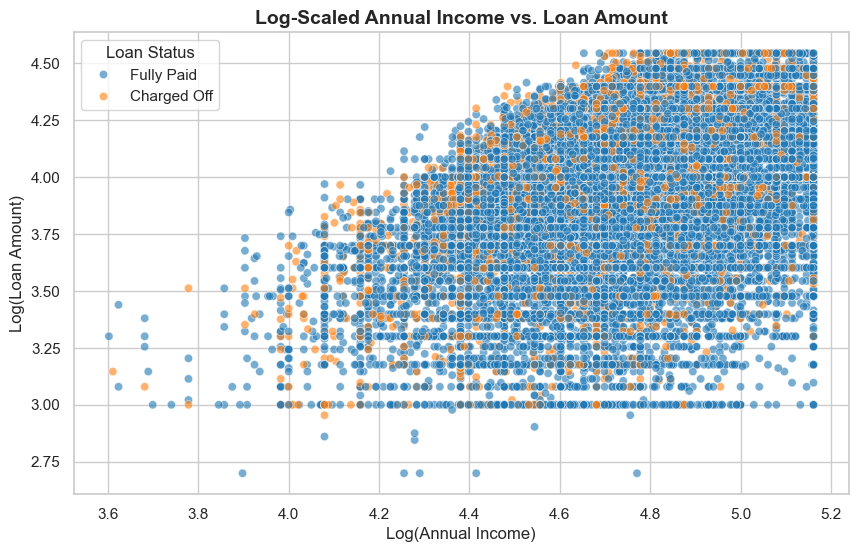

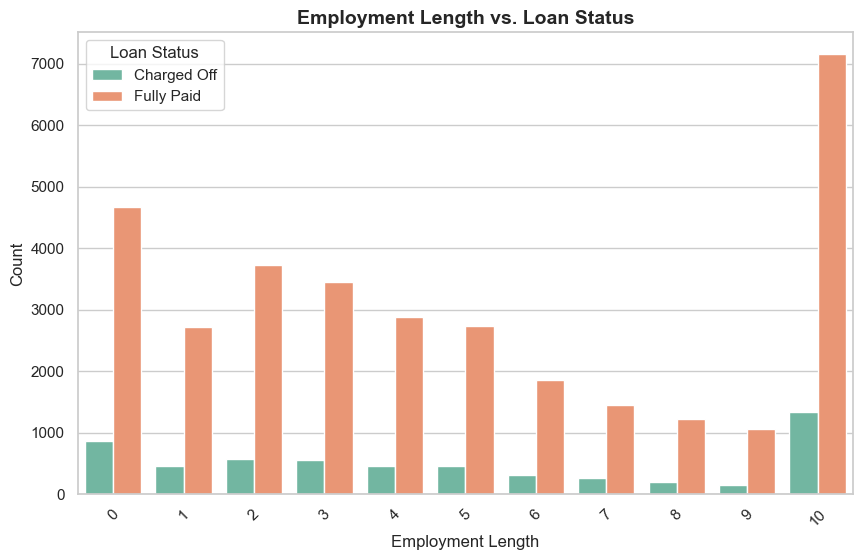

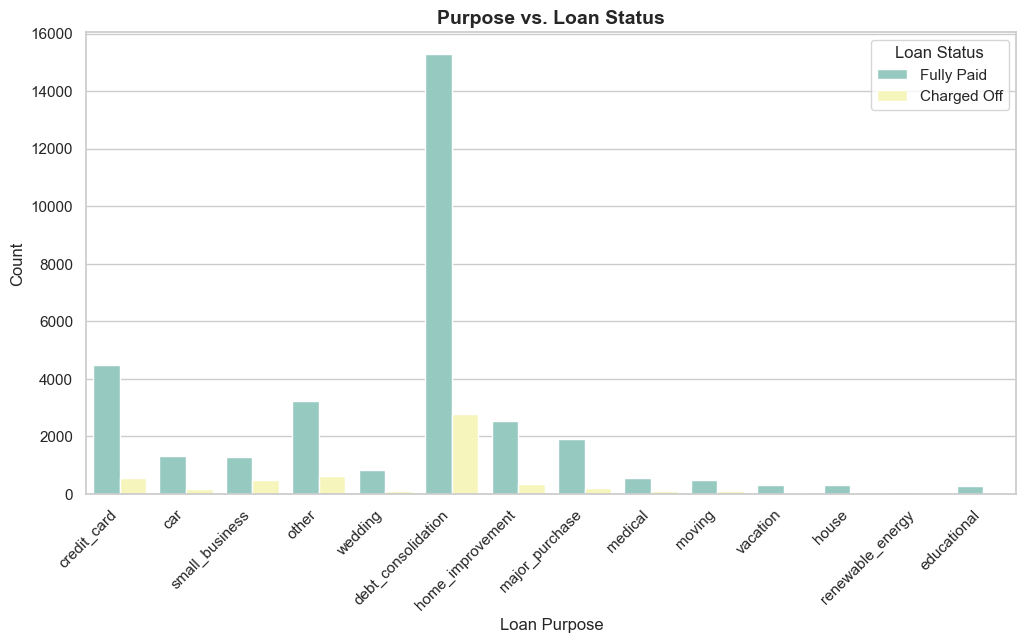

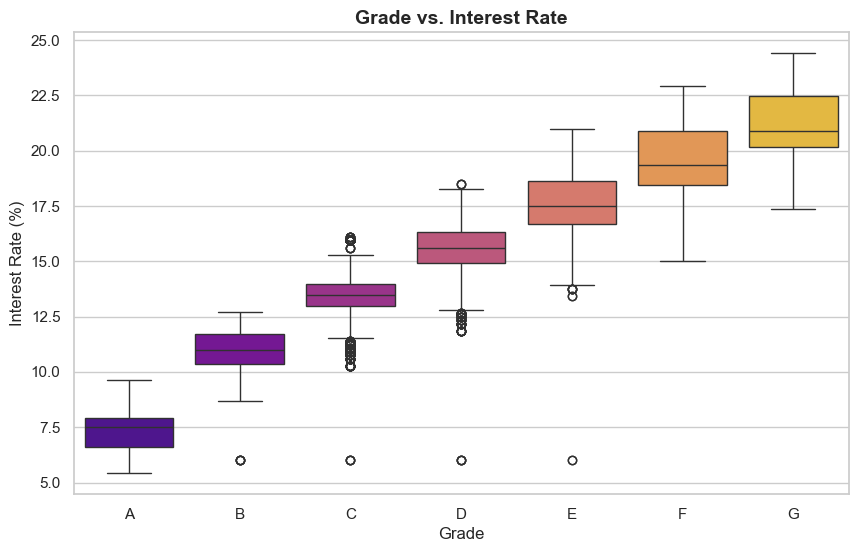

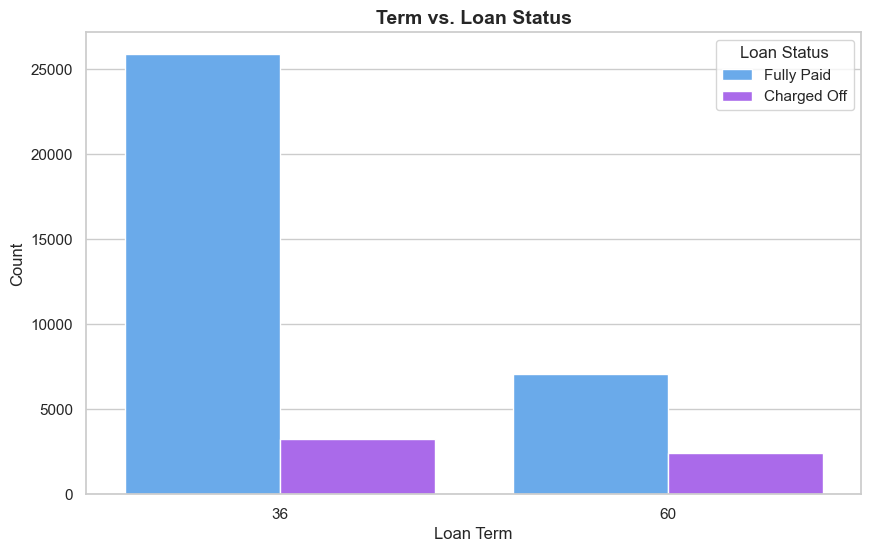

In [78]:
# Set general aesthetics for all plots
sns.set_theme(style="whitegrid")

# 1. Loan Amount vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='loan_status', y='loan_amnt', palette='viridis')
plt.title("Loan Amount vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

# 2. Interest Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='loan_status', y='int_rate', palette='coolwarm')
plt.title("Interest Rate vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()

# 3. Annual Income vs. Loan Amount

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x=np.log10(df1['annual_inc'] + 1),  # Adding 1 to avoid log(0)
    y=np.log10(df1['loan_amnt'] + 1),
    hue='loan_status',
    palette='tab10',
    alpha=0.6
)
plt.title("Log-Scaled Annual Income vs. Loan Amount", fontsize=14, weight='bold')
plt.xlabel("Log(Annual Income)", fontsize=12)
plt.ylabel("Log(Loan Amount)", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

# 4. Employment Length vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='emp_length', hue='loan_status', palette='Set2')
plt.title("Employment Length vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status")
plt.show()

# 5. Purpose vs. Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='purpose', hue='loan_status', palette='Set3')
plt.title("Purpose vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loan Status")
plt.show()

# 6. Grade vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='grade', y='int_rate', palette='plasma')
plt.title("Grade vs. Interest Rate", fontsize=14, weight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()

# 7. Term vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='term', hue='loan_status', palette='cool')
plt.title("Term vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

## Grades E, F, D, and G have the greatest interest rates. Univariate analysis reveals that the defaulter rate is decreasing from B to G, with G having the lowest default rate. Conversely, Grades A, B, and C, which have lower interest rates, display the largest default counts.

## Borrowers that have defaulted incur a high interest rate, where the charged-off loans at the 25th percentile are similar to the 50th percentile interest rates of fully paid borrowers.

## The 75th percentile for charged-off borrowers regarding loan amounts is greater compared to fully paid borrowers, indicating that lending cases should refrain from granting substantial loan amounts to charged-off individuals.

# Multivariate Analysis

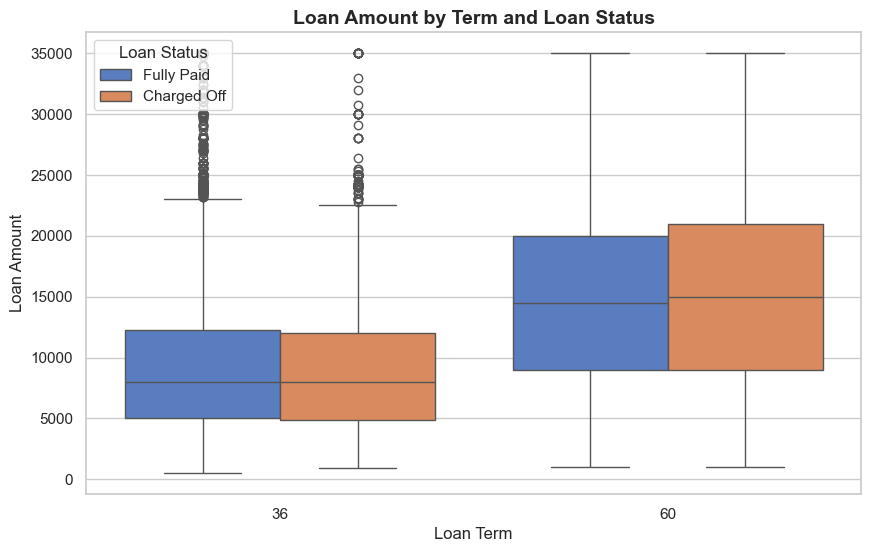

In [70]:
# Loan Amount, Term, and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1,
    x='term',
    y='loan_amnt',
    hue='loan_status',
    palette='muted'
)
plt.title("Loan Amount by Term and Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.legend(title="Loan Status", loc="upper left")
plt.show()

## Borrowers with a 60-month term possess a higher loan amount; yet, univariate research indicates that borrowers with a 36-month term exhibit a greater incidence of default. A larger loan amount correlates with a longer duration, hence mitigating the risk of default.


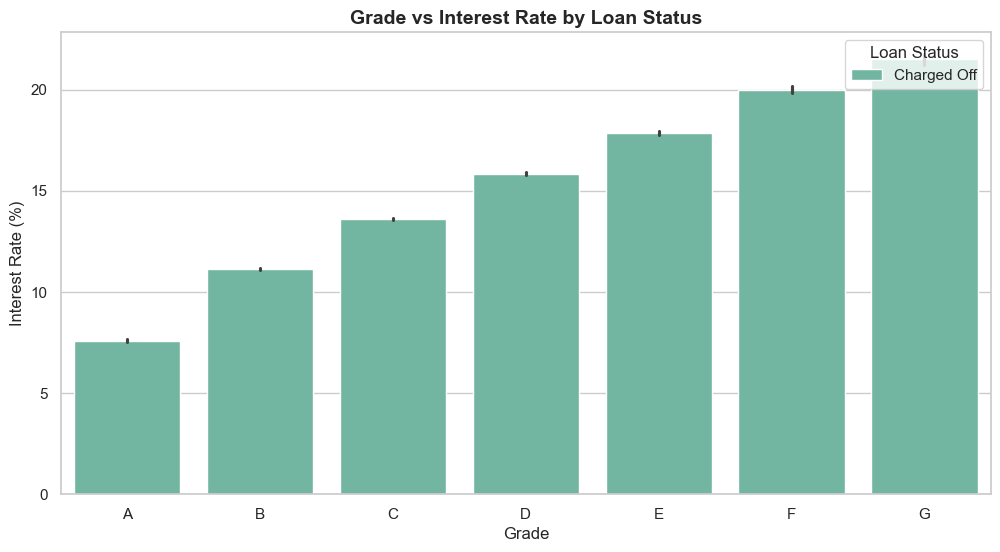

In [71]:
# Grade, Interest Rate, and Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_charged_off,
    x='grade',
    y='int_rate',
    hue='loan_status',
    palette='Set2',
    order= grade_order
)
plt.title("Grade vs Interest Rate by Loan Status", fontsize=14, weight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", loc="upper right")
plt.show()

## As the transition from A to B occurs, the interest rate also escalates, and from the univariate analysis, we noted that Grades D to G have a lower incidence of defaults. 

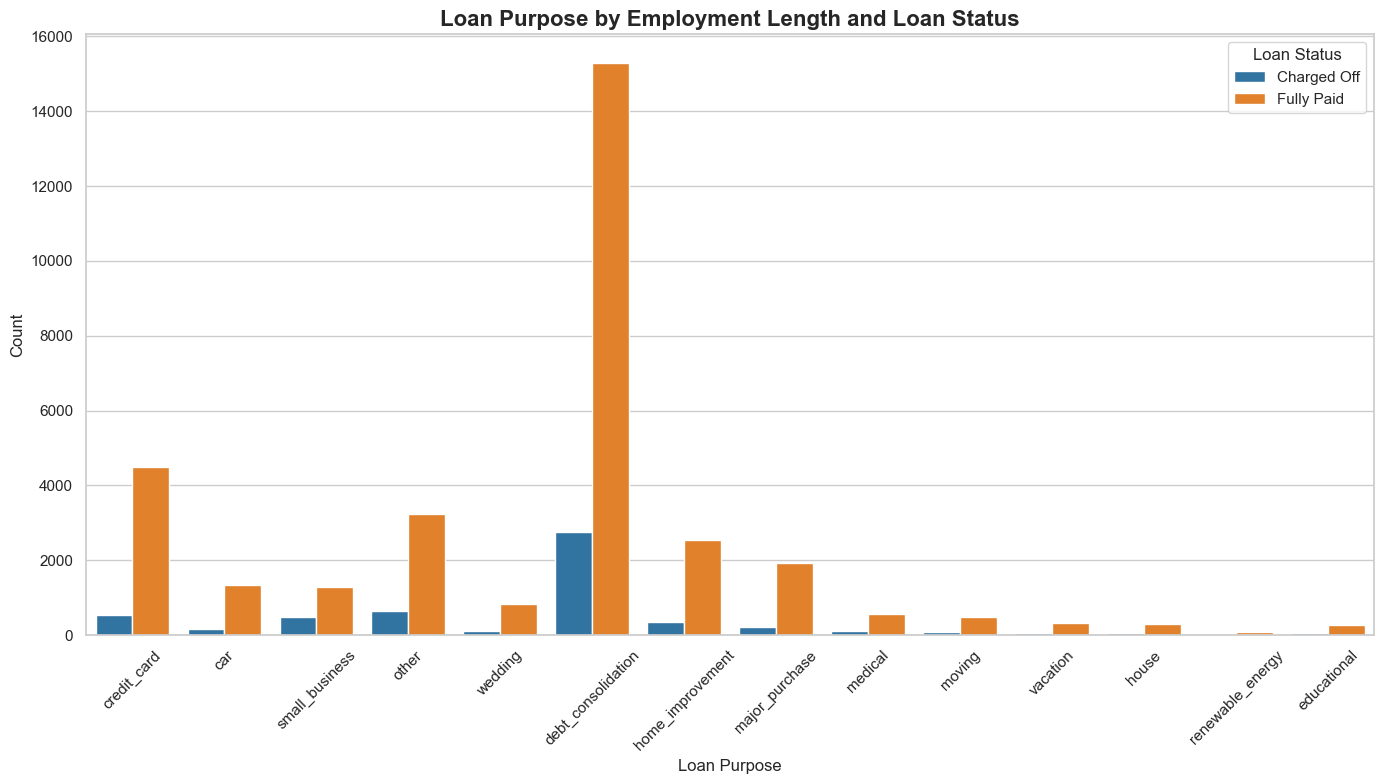

In [72]:
# Purpose, Employment Length, and Loan Status

plt.figure(figsize=(14, 8))

# Create a count plot with employment length and loan status
sns.countplot(
    data=df1,
    x='purpose',
    hue='loan_status',
    palette='tab10',
    hue_order=['Charged Off', 'Fully Paid'],
    dodge=True
)

# Add employment length as a facet (split by 'emp_length')
plt.title("Loan Purpose by Employment Length and Loan Status", fontsize=16, weight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status", loc="upper right")

plt.tight_layout()
plt.show()

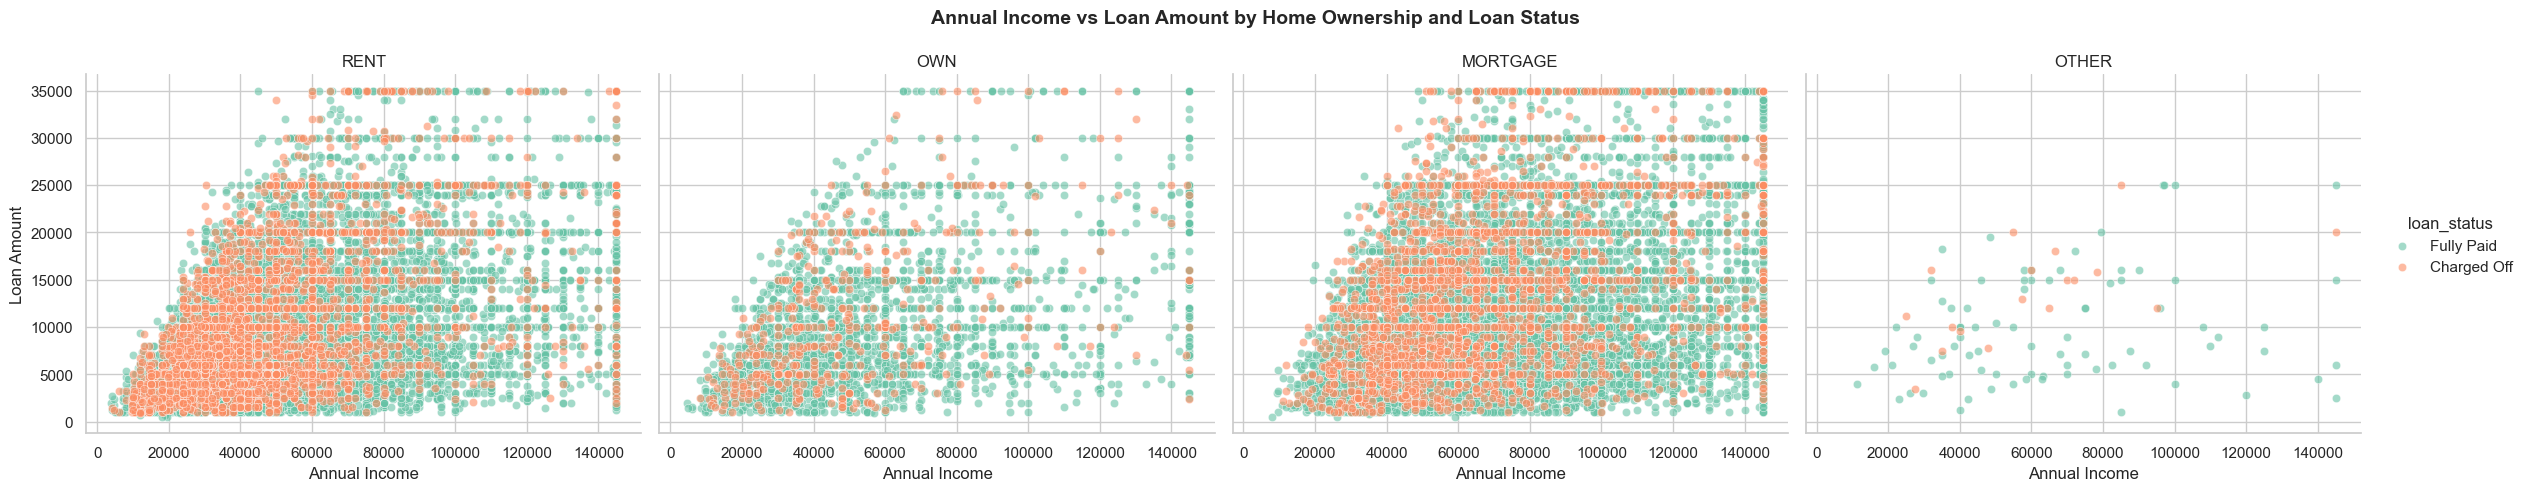

In [73]:
# Annual Income, Home Ownership, and Loan Status
g = sns.FacetGrid(
    df1,
    col="home_ownership",
    hue="loan_status",
    height=5,
    aspect=1.2,
    palette="Set2"
)
g.map(
    sns.scatterplot,
    "annual_inc",
    "loan_amnt",
    alpha=0.6
)
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Annual Income", "Loan Amount")
g.fig.suptitle("Annual Income vs Loan Amount by Home Ownership and Loan Status", fontsize=14, weight='bold')
plt.subplots_adjust(top=0.85)
plt.show()

## Borrowers with mortgages possess higher loan amounts compared to other homeownership statuses, while borrowers classified as 'Renters' with smaller amounts exhibit a greater likelihood of defaulting.

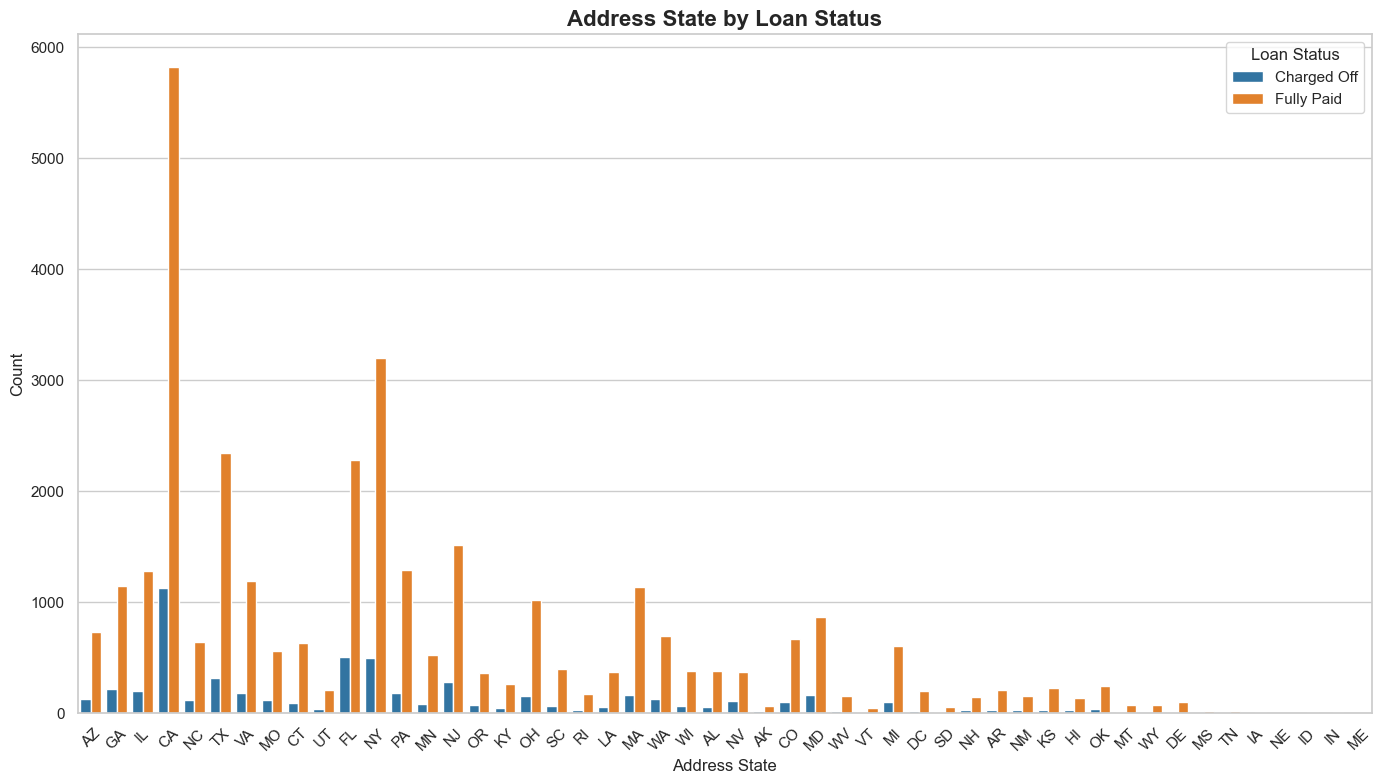

In [74]:
# Address State and Loan Status
plt.figure(figsize=(14, 8))

# Create a count plot with employment length and loan status
sns.countplot(
    data=df1,
    x='addr_state',
    hue='loan_status',
    palette='tab10',
    hue_order=['Charged Off', 'Fully Paid'],
    dodge=True
)

# Add employment length as a facet (split by 'emp_length')
plt.title("Address State by Loan Status", fontsize=16, weight='bold')
plt.xlabel("Address State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status", loc="upper right")

plt.tight_layout()
plt.show()

## The three states with the highest default rates are California (16%), Florida (18%), and New York (13%). Lending Club should exercise increased caution and conduct additional checks when providing loans to these borrowers.

# Correlation analysis

In [75]:
df1['home_ownership_num'] = df1['home_ownership'].replace({
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3
})

In [76]:
df_charged_off['home_ownership_num'] = df_charged_off['home_ownership'].replace({
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3
})

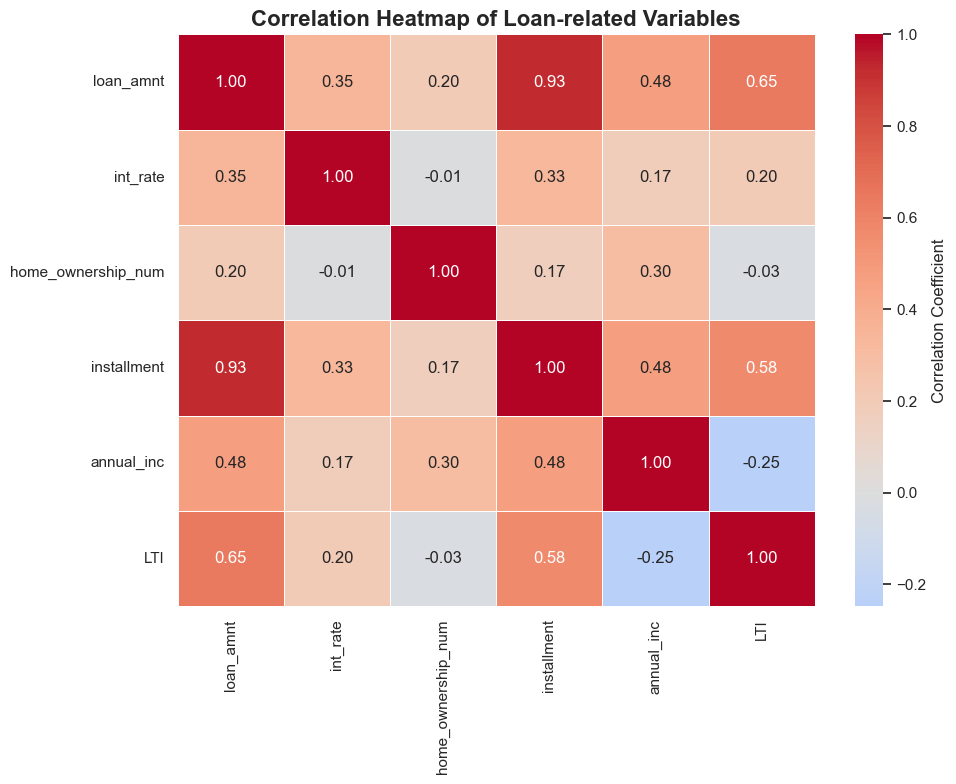

In [77]:
# Select the relevant numeric columns for correlation analysis
numeric_columns = [
    'loan_amnt', 'int_rate', 'home_ownership_num',
    'installment', 'annual_inc', 'LTI'
]

# Compute the correlation matrix
corr_matrix = df_charged_off[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with correlation matrix
sns.heatmap(
    corr_matrix, 
    annot=True,       # Annotate with correlation coefficients
    cmap='coolwarm',  # Color map for correlation values
    center=0,         # Set the center at 0 for better visualization
    linewidths=0.5,   # Add line between cells
    fmt='.2f',        # Format for the correlation coefficient
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for the color bar
)

# Title for the heatmap
plt.title("Correlation Heatmap of Loan-related Variables", fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

### Loan Amount (loan_amnt) and Installment (installment) [0.93]:
A strong association signifies that increased loan amounts are directly associated with increased installment values. This indicates that large loans with high payments may considerably increase the probability of default for borrowers.

### Loan Amount (loan_amnt) and Loan-to-Income Ratio (LTI) [0.65]:
This indicates that larger loans usually have a higher loan-to-income ratio, signifying an increased financial burden when compared to the borrower's income. A high loan-to-income ratio is a potential sign of financial distress and default risk.

### Larger installments correlate with a higher Loan-to-Income Ratio (LTI) of 0.58, 
supporting the idea that financial overcommitment may significantly contribute to defaults.

### Loan Amount (loan_amnt) and Annual Income (annual_inc) [0.48]:
Persons with higher incomes typically secure greater loans. However, elevated income alone may not reduce default risk, since such persons could still encounter difficulties if they excessively leverage their finances.

### Loan-to-Income Ratio (LTI) and Annual Income (annual_inc) [-0.25]:
Borrowers with higher incomes typically exhibit lower loan-to-income ratios. This indicates enhanced financial capacity, however it may not consistently protect against defaults if loan amounts are excessively huge.
